# Optimised Neural Network

In this notebook, we will look into common problem in neural networks, which is overfitting. We will use the a sin(x) and popular MNIST dataset for this purpose, and use different architectures and different train test splits to see how our model performs. Then we try to find optimal hyperparameters for our model to get the best performance.

## Introduction

Overfitting is a common problem in neural networks, where the model performs well on the training data but poorly on the test data. This is because the model has learned the noise in the training data, rather than the underlying pattern. Common reasons for overfitting include using a model that is too complex, not having enough training data, and training for too many epochs. There are several ways to reduce overfitting, such as using dropout, early stopping, and data augmentation. In this notebook, we will explore some of these techniques and see how they can be used to improve the performance of a neural network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras import backend as K
from keras.models import load_model
from keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import imageio.v3 as iio
import os
import shutil
from glob import glob
from sklearn.model_selection import GridSearchCV
from PIL import Image
from tqdm import tqdm
from pygifsicle import optimize
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier

In [2]:
files_layers = glob("../data/OptimisedNN/sin/layers/*")
files_ratios = glob("../data/OptimisedNN/sin/ratios/*")

layer_gif = "../data/OptimisedNN/sin/layers/layers.gif"
ratio_gif = "../data/OptimisedNN/sin/ratios/ratios.gif"

for file in files_layers:
    shutil.rmtree(file)
for file in files_ratios:
    shutil.rmtree(file)

## Dataset

At first we will use a simple sin(x) dataset to demonstrate overfitting. We will generate 1000 data points between 0 and 4*pi and use this as our training data. We will then use different architectures and train test splits to see how our model performs. We will then use the popular MNIST dataset to further demonstrate overfitting and explore different techniques to reduce it.

## Regression 

We first analyze overfitting on a simple regression problem. 

In [3]:
x_sin_values = np.linspace(0, 4 * np.pi, 1000)
y_sin_values = np.sin(x_sin_values)

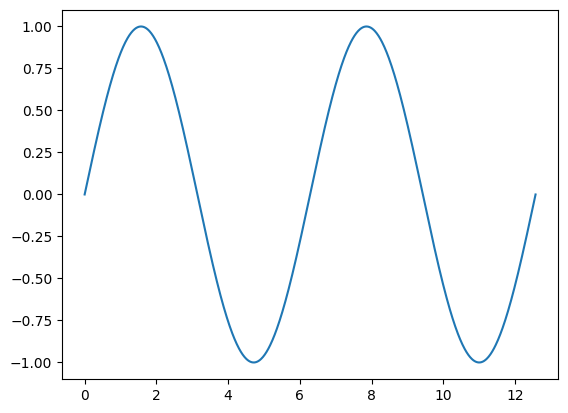

In [ ]:
x = x_sin_values.reshape(-1, 1)
y = y_sin_values.reshape(-1, 1)
plt.plot(x, y)
plt.show()

At first we try with 2-layer neural network with different ratios of train test splits, and see how it performs.

In [4]:
TRAIN_TEST_RATIOS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
EPOCHS = [100, 200, 500]
LOSS_FUNCTIONS = ["mse", "mae"]

Hyperparameters are things like learning rate, batch size, number of epochs, etc. that are set before the training process begins. These are the parameters that are set before the training process begins, and are not learned by the model. Hyperparameters can have a significant impact on the performance of a model, and finding the right hyperparameters can be a challenging task. In this notebook, we will explore some common hyperparameters and see how they can be tuned to improve the performance of a neural network.

Some common hyperparameters include:

- Learning rate: The rate at which the model learns from the training data. A higher learning rate can help the model converge faster, but may result in overshooting the optimal solution. A lower learning rate can help the model converge more slowly, but may result in getting stuck in local minima.
- Batch size: The number of samples that are used to update the model parameters in each iteration. A larger batch size can help the model converge faster, but may require more memory. A smaller batch size can help the model converge more slowly, but may result in more noise in the updates.
- Number of epochs: The number of times the model sees the entire training data. A larger number of epochs can help the model learn more from the training data, but may result in overfitting. A smaller number of epochs can help the model generalize better, but may result in underfitting.
- Activation function: The function that is applied to the output of each neuron. Common activation functions include `ReLU`, sigmoid, and tanh. The choice of activation function can have a significant impact on the performance of the model.
- Number of layers: The number of layers in the neural network. A deeper network can learn more complex patterns, but may require more data and more training time. A shallower network may be easier to train, but may not be able to learn as complex patterns.
- Number of neurons: The number of neurons in each layer of the neural network. A larger number of neurons can help the model learn more complex patterns, but may require more data and more training time. A smaller number of neurons may be easier to train, but may not be able to learn as complex patterns.
- Dropout rate: The rate at which neurons are randomly dropped out during training. Dropout can help prevent overfitting by reducing the co-adaptation of neurons, but may require more training time.
- Optimizer: The algorithm used to update the model parameters based on the loss function. Common optimizers include SGD, Adam, and RMSprop. The choice of optimizer can have a significant impact on the performance of the model.
- Weight initialization: The technique used to initialize the weights of the neural network. Common weight initialization techniques include random initialization, Xavier initialization, and He initialization. The choice of weight initialization can have a significant impact on the performance of the model.
- Learning rate schedule: The technique used to adjust the learning rate during training. Common learning rate schedules include step decay, exponential decay, and cosine annealing. The choice of learning rate schedule can have a significant impact on the performance of the model.
- Regularization Parameter: The parameter used to control the strength of the regularization term. A larger regularization parameter can help prevent overfitting, but may result in underfitting. A smaller regularization parameter may not be able to prevent overfitting, but may result in better performance on the training data.

In [ ]:
def show_animated(create_gif=False, frames=None):
    display.clear_output(wait=True)
    display.display(plt.gcf())

    if create_gif:
        plt.draw()
        fig = plt.gcf()
        fig.canvas.draw()
        img = np.array(fig.canvas.renderer.buffer_rgba())
        frames.append(Image.fromarray(img))
    plt.clf()


def save_gif(frames, file_name, mspf=250):
    frames[0].save(
        file_name + ".gif",
        save_all=True,
        append_images=frames[1:],
        optimize=False,
        duration=len(frames) * mspf,
        loop=0,
    )

In [5]:
def create_model_regression(num_layers, num_neurons, activation, loss):
    model = Sequential()
    model.add(Input(shape=(1,)))
    for i in range(num_layers):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss=loss)
    return model


def create_model_regression(n_hidden_layers):
    model = Sequential()
    model.add(Dense(units=12, activation="relu", input_dim=1))
    for _ in range(n_hidden_layers):
        model.add(Dense(units=8, activation="relu"))
    model.add(Dense(units=1, activation="linear"))

    model.compile(
        optimizer="adam",
        loss="mean_squared_error",
    )

    return model

In [6]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))

In [8]:
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true))

In [9]:
def error_stats(mses, rmses, maes, y_true, y_pred, ratio=None, num_layer=None):
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    
    rmse = root_mean_squared_error(y_true, y_pred)
    rmses.append(rmse)
    
    mae = mean_absolute_error(y_true, y_pred)
    maes.append(mae)
    
    print("For " + (f"ratio {ratio}" if ratio else f"layer {num_layer}"))
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print()

At first we plot some models that will not work well because of overfit and other architectural problems. 

In [ ]:
FILE_PATH = "../data/OptimisedNN/sin/"

In [11]:
def plot_sin_predictions_ratio(loss, epochs, activation, num_neurons):
    accuracy_mses = []
    accuracy_rmses = []
    accuracy_maes = []
    
    model_path = (
        FILE_PATH
        + "ratios/"
        + f"model_layers.{2}_neurons.{num_neurons}_epochs.{epochs}_activation.{activation}_loss.{loss}/"
    )
    
    if not os.path.exists(model_path):
        os.makedirs(model_path)

    for i, ratio in enumerate(TRAIN_TEST_RATIOS):
        model = create_model_regression(2, num_neurons, activation, loss)
        file_path = model_path + f"ratio.{ratio}/"

        if not os.path.exists(file_path):
            os.makedirs(file_path)

        x_train, x_test, y_train, y_test = train_test_split(x_sin_values, y_sin_values, test_size=ratio)
        

        history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

        y_test_pred = model.predict(x_test)

        error_stats(accuracy_mses, accuracy_rmses, accuracy_maes, y_test, y_test_pred, ratio=ratio)

        plt.figure()
        plt.plot(history.history["loss"])
        plt.title(f"Loss function changes for ratio {ratio}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        loss_filename = f"{file_path}loss_{i}.png"
        plt.savefig(loss_filename)
        plt.close()

        y_pred = model.predict(x_sin_values)
        plt.figure()
        plt.plot(x_sin_values, y_sin_values, label="True function")
        plt.plot(x_sin_values, y_pred, label="Estimated function")
        plt.title(f"Function estimation for ratio {ratio}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        sin_filename = f"{file_path}sin_{i}.png"
        plt.savefig(sin_filename)
        plt.close()

    frames_loss = np.stack(
        [
            iio.imread(f"{model_path}ratio.{TRAIN_TEST_RATIOS[i]}/loss_{i}.png")
            for i in range(len(TRAIN_TEST_RATIOS))
        ]
    )
    iio.imwrite(f"{model_path}loss.gif", frames_loss, fps=0.5)

    frames_sin = np.stack(
        [
            iio.imread(f"{model_path}ratio.{TRAIN_TEST_RATIOS[i]}/sin_{i}.png")
            for i in range(len(TRAIN_TEST_RATIOS))
        ]
    )
    iio.imwrite(f"{model_path}sin.gif", frames_sin, fps=0.5)

    plt.figure()
    plt.plot(TRAIN_TEST_RATIOS, accuracy_mses, label="Mean Squared Error")
    plt.plot(TRAIN_TEST_RATIOS, accuracy_rmses, label="Root Mean Squared Error")
    plt.plot(TRAIN_TEST_RATIOS, accuracy_maes, label="Mean Absolute Error")
    plt.title("Error changes for different ratios")
    plt.xlabel("Train test ratio")
    plt.ylabel("Error")
    plt.legend(loc="upper right")
    plt.savefig(f"{model_path}errors.png")
    plt.close()

    # for removing files
    # os.remove(loss_filename)
    # os.remove(sin_filename)

In [27]:
NUM_LAYERS = np.linspace(2, 20, 19, dtype=int)

In [28]:
def plot_sin_predictions_layers(loss, epochs, activation, num_neurons):
    accuracy_mses = []
    accuracy_rmses = []
    accuracy_maes = []

    model_path = (
        FILE_PATH
        + "layers/"
        + f"model_epochs._neurons.{num_neurons}_epochs.{epochs}_activation.{activation}_loss.{loss}/"
    )
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    
    for i, num_layer in enumerate(NUM_LAYERS):
        model = create_model_regression(num_layer, num_neurons, activation, loss)
        
        file_path = model_path + f"layers.{num_layer}/"
        if not os.path.exists(file_path):
            os.makedirs(file_path)        

        x_train, x_test, y_train, y_test = train_test_split(x_sin_values, y_sin_values, test_size=.9)

        history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

        y_test_pred = model.predict(x_test)

        error_stats(accuracy_mses, accuracy_rmses, accuracy_maes, y_test, y_test_pred, num_layer=num_layer)

        plt.figure()
        plt.plot(history.history["loss"])
        plt.title(f"Loss function changes for layers {num_layer}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        loss_filename = f"{file_path}loss_{i}.png"
        plt.savefig(loss_filename)
        plt.close()

        y_pred = model.predict(x_sin_values)
        plt.figure()
        plt.plot(x_sin_values, y_sin_values, label="True function")
        plt.plot(x_sin_values, y_pred, label="Estimated function")
        plt.title(f"Function estimation for layers {num_layer}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        sin_filename = f"{file_path}sin_{i}.png"
        plt.savefig(sin_filename)
        plt.close()
        
    frames_loss = np.stack(
        [
            iio.imread(f"{model_path}layers.{NUM_LAYERS[i]}/loss_{i}.png")
            for i in range(len(NUM_LAYERS))
        ]
    )
    iio.imwrite(f"{model_path}loss.gif", frames_loss, fps=0.5)
    
    frames_sin = np.stack(
        [
            iio.imread(f"{model_path}layers.{NUM_LAYERS[i]}/sin_{i}.png")
            for i in range(len(NUM_LAYERS))
        ]
    )
    iio.imwrite(f"{model_path}sin.gif", frames_sin, fps=0.5)

    plt.figure()
    plt.plot(NUM_LAYERS, accuracy_mses, label="Mean Squared Error")
    plt.plot(NUM_LAYERS, accuracy_rmses, label="Root Mean Squared Error")
    plt.plot(NUM_LAYERS, accuracy_maes, label="Mean Absolute Error")
    plt.title("Error changes for different layers")
    plt.xlabel("Number of layers")
    plt.ylabel("Error")
    plt.legend(loc="upper right")    
    plt.savefig(f"{model_path}errors.png")
    plt.close()

You can use above code with different hyperparameters to see how it performs.

### Effect of Train Test Split

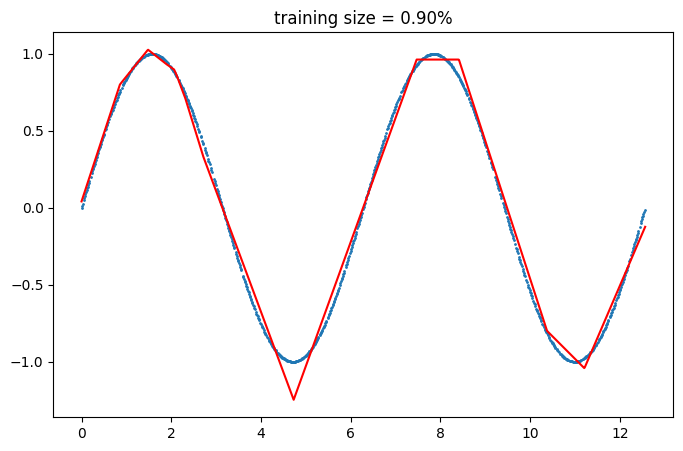

<Figure size 800x500 with 0 Axes>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sin_values, y_sin_values, train_size=0.1, shuffle=True)


mse_train = []
mse_test = []
r2_train = []
r2_test = []
frames = []
_ = plt.figure(figsize=(8, 5))
for i in range(1, 10):
    model = create_model_regression(2)
    model.fit(x_train, y_train, epochs=400, verbose=0, batch_size=16)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    mse_train.append(mean_squared_error(y_train_pred, y_train))
    mse_test.append(mean_squared_error(y_test_pred, y_test))
    r2_train.append(r2_score(y_train_pred, y_train))
    r2_test.append(r2_score(y_test_pred, y_test))

    y_pred = model.predict(x_sin_values)
    plt.title(f"training size = {(len(x_train) / (len(x_train) + len(x_test))):.2f}%")
    plt.plot(x_sin_values, y_pred, "red")
    plt.scatter(x_train, y_train, s=1)

    show_animated(create_gif=True, frames=frames)

    x_train = np.concatenate((x_train, x_test[:100]), axis=0)
    y_train = np.concatenate((y_train, y_test[:100]), axis=0)
    x_test = x_test[100:]
    y_test = y_test[100:]

In [ ]:
save_gif(frames, ratio_gif)

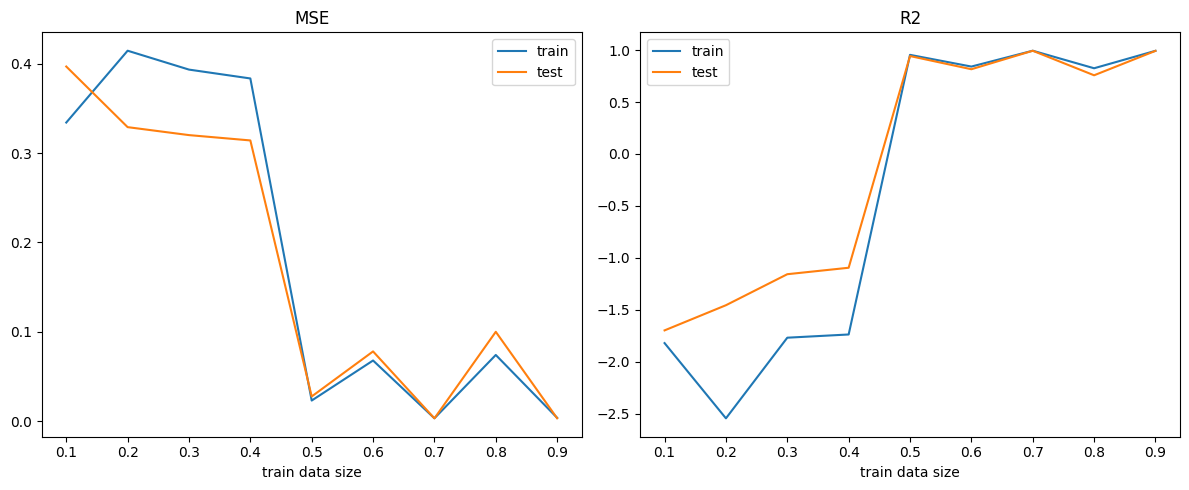

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

axes[0].plot(sizes, mse_train, label="train")
axes[0].plot(sizes, mse_test, label="test")
axes[0].set_title("MSE")
axes[0].set_xlabel("train data size")
axes[0].set_xticks(sizes)
axes[0].legend()

axes[1].plot(sizes, r2_train, label="train")
axes[1].plot(sizes, r2_test, label="test")
axes[1].set_title("R2")
axes[1].set_xlabel("train data size")
axes[1].set_xticks(sizes)
axes[1].legend()

plt.tight_layout()
plt.show()

### Effect of Number of Layers

### With Same Epochs

In [ ]:
save_gif(frames, layer_gif)

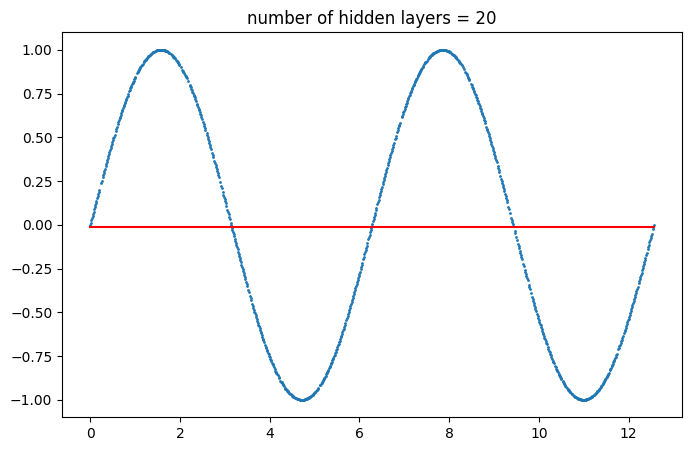

<Figure size 800x500 with 0 Axes>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

frames = []
mse_train = []
mse_test = []
r2_train = []
r2_test = []

layers = list(range(1, 21))

_ = plt.figure(figsize=(8,5))
for i in layers:
    model = create_model(i)
    model.fit(x_train, y_train, epochs=200, verbose=False, batch_size=16)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    mse_train.append(mean_squared_error(y_train_pred, y_train))
    mse_test.append(mean_squared_error(y_test_pred, y_test))
    r2_train.append(r2_score(y_train_pred, y_train))
    r2_test.append(r2_score(y_test_pred, y_test))

    y_pred = model.predict(x)
    plt.title(f'number of hidden layers = {i}')
    plt.plot(x, y_pred, 'red')
    plt.scatter(x_train, y_train, s=1)

    show_animated(True, frames)
save_gif(frames, 'regression-number-of-layers')


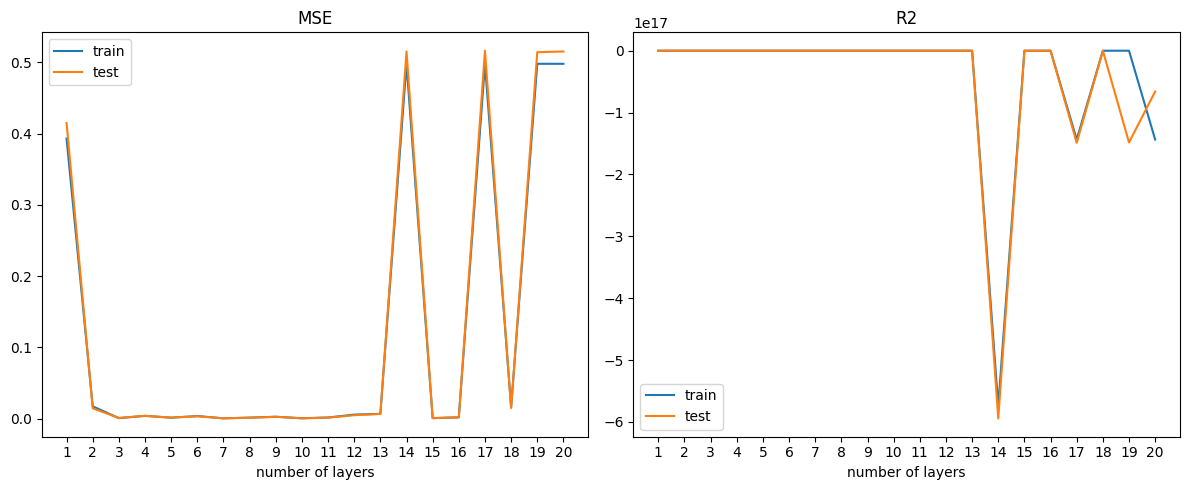

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].plot(layers, mse_train, label='train')
axes[0].plot(layers, mse_test, label='test')
axes[0].set_title('MSE')
axes[0].set_xlabel('number of layers')
axes[0].set_xticks(layers)
axes[0].legend()

axes[1].plot(layers, r2_train, label='train')
axes[1].plot(layers, r2_test, label='test')
axes[1].set_title('R2')
axes[1].set_xlabel('number of layers')
axes[1].set_xticks(layers)
axes[1].legend()

plt.tight_layout()
plt.show()

### With Changing Epochs

Now we observe the changes of model accuracy with different number of layers with different number of epoch for each

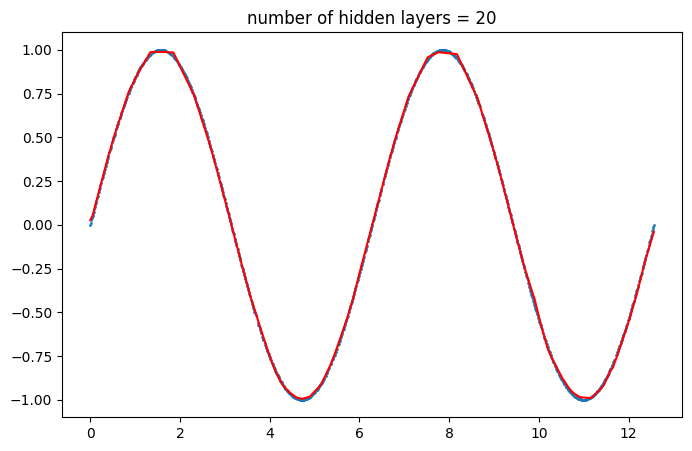

<Figure size 800x500 with 0 Axes>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sin_values, y_sin_values, test_size=0.1, shuffle=True)

frames = []
mse_train = []
mse_test = []
r2_train = []
r2_test = []

layers = list(range(1, 21))

_ = plt.figure(figsize=(8,5))
for i in layers:
    model = create_model_regression(i)
    model.fit(x_train, y_train, epochs=10 * i, verbose=False, batch_size=32)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    mse_train.append(mean_squared_error(y_train_pred, y_train))
    mse_test.append(mean_squared_error(y_test_pred, y_test))
    r2_train.append(r2_score(y_train_pred, y_train))
    r2_test.append(r2_score(y_test_pred, y_test))

    y_pred = model.predict(x_sin_values)
    plt.title(f'number of hidden layers = {i}')
    plt.plot(x_sin_values, y_pred, 'red')
    plt.scatter(x_train, y_train, s=1)

    show_animated(True, frames)

In [ ]:
save_gif(frames, layer_gif + "_with_different_epoch")

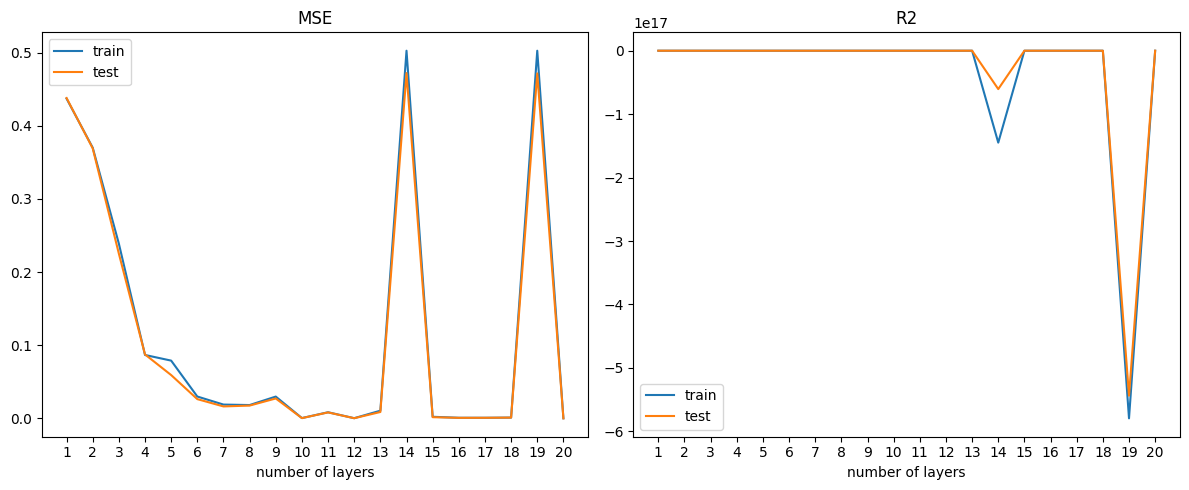

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].plot(layers, mse_train, label='train')
axes[0].plot(layers, mse_test, label='test')
axes[0].set_title('MSE')
axes[0].set_xlabel('number of layers')
axes[0].set_xticks(layers)
axes[0].legend()

axes[1].plot(layers, r2_train, label='train')
axes[1].plot(layers, r2_test, label='test')
axes[1].set_title('R2')
axes[1].set_xlabel('number of layers')
axes[1].set_xticks(layers)
axes[1].legend()

plt.tight_layout()
plt.show()

### Grid Search

Now we will use grid search to find the best hyperparameters for our model. Grid search is a technique that is used to find the best hyperparameters for a model by searching through a grid of possible values. For each combination of hyperparameters in the grid, the model is trained and evaluated on the validation data. The hyperparameters that result in the best performance on the validation data are then selected as the best hyperparameters for the model.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sin_values, y_sin_values, test_size=0.2, shuffle=True)

n_hidden_layers = range(1, 21)
model = KerasRegressor(
    model=create_model_regression,
    verbose=0,
    n_hidden_layers=n_hidden_layers,
    epochs=80,
    batch_size=32,
)
param_grid = dict(n_hidden_layers=n_hidden_layers)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)
score = grid.score(x_test, y_test)

In [ ]:
print("test score:", score)

test score: 0.999664815233946


In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[["param_n_hidden_layers", "mean_test_score"]]
results.sort_values("mean_test_score", ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,param_n_hidden_layers,mean_test_score
0,16,0.967195
1,12,0.962981
2,11,0.962320
3,7,0.945715
4,8,0.911545
5,14,0.855808
6,5,0.816648
7,10,0.793423
8,13,0.774820
9,6,0.761655


## Classification

We now analyze overfitting on a classification problem using the MNIST dataset.

In [43]:
(x_minst_train, y_minst_train), (x_minst_test, y_minst_test) = mnist.load_data()
assert x_minst_train.shape == (60000, 28, 28)
assert x_minst_test.shape == (10000, 28, 28)
assert y_minst_train.shape == (60000,)
assert y_minst_test.shape == (10000,)

In [ ]:
x = np.concatenate((x_minst_train, x_minst_test), axis=0).reshape(-1, 784).astype("float32") / 255.0
y = np.concatenate((y_minst_train, y_minst_test), axis=0)
y = keras.utils.to_categorical(y)

In [ ]:
def create_model_classification(n_hidden_layers):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(784,)))
    for _ in range(n_hidden_layers):
        model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

We now analyze different hyperparameters to see their effect on the model performance.

### Effect of Train Test Ratio

In [ ]:
loss_train = []
loss_test = []
accuracy_train = []
accuracy_test = []


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.05, shuffle=True)
n = int(0.15 * 70000)

for i in range(7):
    model = create_model_classification(3)

    model.fit(x_train, y_train, epochs=15, verbose=0, batch_size=4000)

    train_loss, train_accuracy = model.evaluate(x_train, y_train)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)

    loss_train.append(train_loss)
    loss_test.append(test_loss)
    accuracy_train.append(train_accuracy)
    accuracy_test.append(test_accuracy)

    x_train = np.concatenate((x_train, x_test[:n]), axis=0)
    y_train = np.concatenate((y_train, y_test[:n]), axis=0)
    x_test = x_test[n:]
    y_test = y_test[n:]

110/110 [==============================] - 0s 700us/step - loss: 0.3487 - accuracy: 0.9040


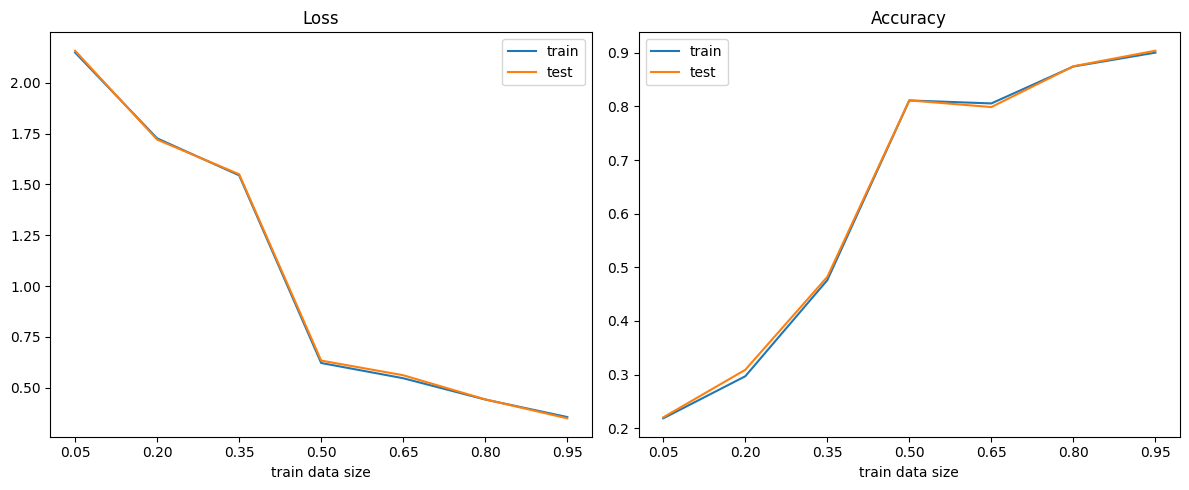

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sizes = [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95]

axes[0].plot(sizes, loss_train, label="train")
axes[0].plot(sizes, loss_test, label="test")
axes[0].set_title("Loss")
axes[0].set_xlabel("train data size")
axes[0].set_xticks(sizes)
axes[0].legend()

axes[1].plot(sizes, accuracy_train, label="train")
axes[1].plot(sizes, accuracy_test, label="test")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("train data size")
axes[1].set_xticks(sizes)
axes[1].legend()

plt.tight_layout()
plt.show()

### Effect of number of Layers

#### without changing batch size

In [ ]:
losses = []
accuracies = []

layers = list(range(3, 21))
for i in layers:
    model = create_model_classification(n_hidden_layers = i)
    model.fit(x, y, batch_size=4000, epochs=10, verbose = False)
    
    loss, accuracy = model.evaluate(x, y)

    accuracies.append(accuracy)
    losses.append(loss)

2188/2188 [==============================] - 2s 787us/step - loss: 2.3011 - accuracy: 0.1125


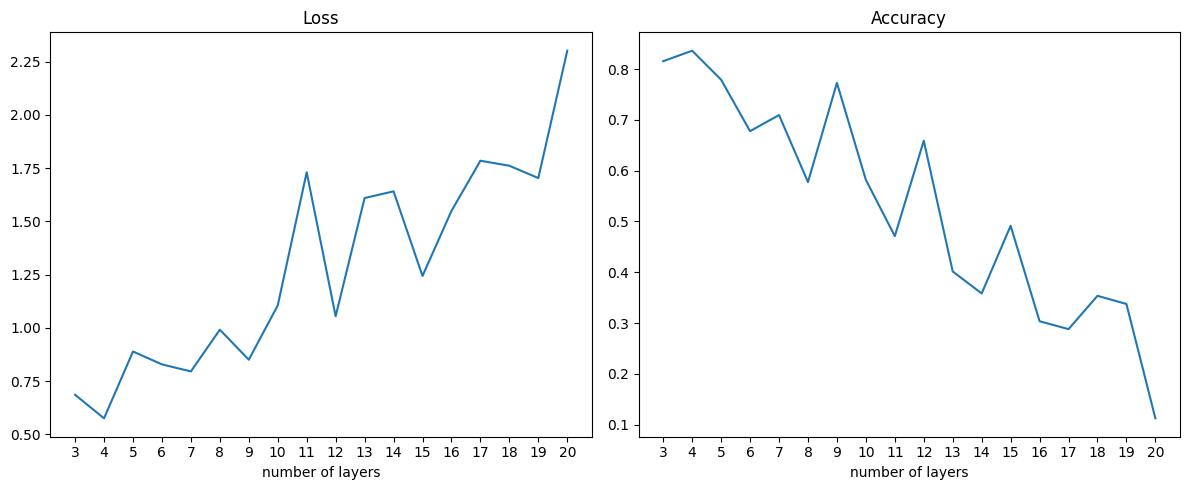

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(layers, losses, label="train")
axes[0].set_title("Loss")
axes[0].set_xlabel("number of layers")
axes[0].set_xticks(layers)

axes[1].plot(layers, accuracies)
axes[1].set_title("Accuracy")
axes[1].set_xlabel("number of layers")
axes[1].set_xticks(layers)


plt.tight_layout()
plt.show()

#### with changing batch size

In [ ]:
losses = []
accuracies = []

layers = list(range(3, 21))
for i in layers:
    model = create_model_classification(n_hidden_layers=i)
    model.fit(x, y, batch_size=4000, epochs=5 * i, verbose=False)

    loss, accuracy = model.evaluate(x, y)

    accuracies.append(accuracy)
    losses.append(loss)

2188/2188 [==============================] - 2s 770us/step - loss: 0.2910 - accuracy: 0.9234


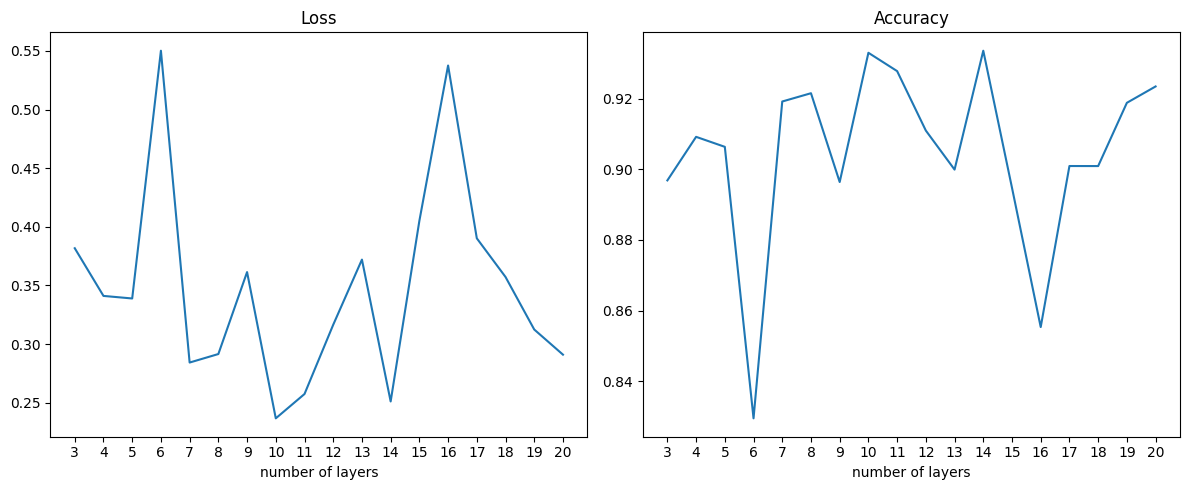

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(layers, losses, label="train")
axes[0].set_title("Loss")
axes[0].set_xlabel("number of layers")
axes[0].set_xticks(layers)

axes[1].plot(layers, accuracies)
axes[1].set_title("Accuracy")
axes[1].set_xlabel("number of layers")
axes[1].set_xticks(layers)


plt.tight_layout()
plt.show()

### Grid Search for Optimal

In [ ]:
def create_optimal(units=64):
    model = Sequential()
    model.add(Dense(units, activation="relu", input_shape=(784,)))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


units = [32, 64, 128]
param_grid = {
    "units": units, 
    "batch_size": [128, 256], 
    "epochs": [10, 20]
}

model = KerasClassifier(model=create_optimal, verbose=0, units=units)


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)
grid.score(x_test, y_test)

0.9750714285714286

In [ ]:
results = pd.DataFrame(grid_result.cv_results_)
results = results[["params", "mean_test_score"]]
results.sort_values("mean_test_score", ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_test_score
0,"{'batch_size': 128, 'epochs': 20, 'units': 128}",0.973107
1,"{'batch_size': 256, 'epochs': 20, 'units': 128}",0.971696
2,"{'batch_size': 128, 'epochs': 10, 'units': 128}",0.970446
3,"{'batch_size': 128, 'epochs': 20, 'units': 64}",0.969304
4,"{'batch_size': 256, 'epochs': 20, 'units': 64}",0.967304
5,"{'batch_size': 256, 'epochs': 10, 'units': 128}",0.967071
6,"{'batch_size': 128, 'epochs': 10, 'units': 64}",0.964214
7,"{'batch_size': 128, 'epochs': 20, 'units': 32}",0.960607
8,"{'batch_size': 256, 'epochs': 10, 'units': 64}",0.959089
9,"{'batch_size': 128, 'epochs': 10, 'units': 32}",0.954518


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle=True)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))  
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=60, verbose=1, batch_size=1000)

train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

Epoch 1/60
56/56 [==============================] - 2s 16ms/step - loss: 1.1408 - accuracy: 0.6263
Epoch 2/60
56/56 [==============================] - 1s 14ms/step - loss: 0.3938 - accuracy: 0.8924
Epoch 3/60
56/56 [==============================] - 1s 15ms/step - loss: 0.2679 - accuracy: 0.9279
Epoch 4/60
56/56 [==============================] - 1s 14ms/step - loss: 0.2067 - accuracy: 0.9458
Epoch 5/60
56/56 [==============================] - 1s 14ms/step - loss: 0.1684 - accuracy: 0.9548
Epoch 6/60
56/56 [==============================] - 1s 17ms/step - loss: 0.1461 - accuracy: 0.9620
Epoch 7/60
56/56 [==============================] - 1s 13ms/step - loss: 0.1269 - accuracy: 0.9668
Epoch 8/60
56/56 [==============================] - 1s 15ms/step - loss: 0.1112 - accuracy: 0.9706
Epoch 9/60
56/56 [==============================] - 1s 15ms/step - loss: 0.0992 - accuracy: 0.9735
Epoch 10/60
56/56 [==============================] - 1s 15ms/step - loss: 0.0891 - accuracy: 0.9762
Epoch 11/

In [ ]:
print(test_accuracy)

0.9816428422927856


We then searched for optimal neural network for MNIST on the internet and found these:

- [Optimizing Hyperparameters for the MNIST Dataset in CNN](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/)

- [Optimizing Hyperparameters for the MNIST Dataset in javascript](https://medium.com/@martin_stoyanov/optimizing-hyperparameters-for-the-mnist-dataset-in-javascript-4cb8c17df940)


- [Optimizing Hyperparameters for the MNIST Dataset in python](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/multi-class_classification_with_MNIST.ipynb?hl=en#scrollTo=wYG5qXpP5a9n ) 

- [Optimize Neural Network on MNIST](https://arxiv.org/abs/2012.06898)